In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score

In [3]:
import requests, json, csv

In [ ]:
def load_json_prop(json, prop):
    value=0
    for uf in json:
        value += uf[prop]
    return value

In [ ]:
def load_data():
    data = []

    i = 0
    for month in range(3, 9):
        for date in range(1, 32):
            i += 1
            # print("Collecting " + str(date) + "/" + str(month))
            response = requests.get("https://covid19-brazil-api.now.sh/api/report/v1/brazil/2020" + f"{month:02d}" + f"{date:02d}")
            if response.status_code != 200:
                continue
            responseJson = json.loads(response.text)["data"]
            cases = load_json_prop(responseJson, "cases")
            if cases == 0:
                continue
            row = []
            row.append(month)
            row.append(date)
            row.append(cases)
            row.append(i)
            data.append(row)

    return data

In [ ]:
data = load_data()

with open('database.csv', mode='w') as fl:
    fl = csv.writer(fl, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    fl.writerow(['Month', 'Day', 'Cases', 'Time'])

    for evidences in data:
        fl.writerow(evidences)

In [4]:
cases = pd.read_csv("database.csv")
cases

,Month,Day,Cases,Time
0,3,1,2,1
1,3,2,2,2
2,3,3,2,3
3,3,4,3,4
4,3,5,7,5
...,...,...,...,...
160,8,27,3761391,182
161,8,28,3804803,183
162,8,29,3846153,184
163,8,30,3862311,185


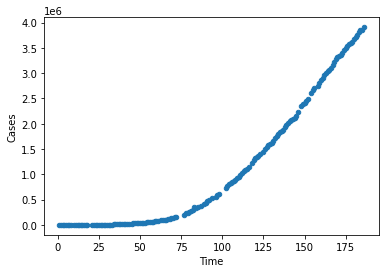

In [5]:
cases.plot.scatter(x="Time", y="Cases")

In [34]:
modelRidge = RidgeCV()
evidences = cases[["Time"]]
labels = cases["Cases"]
train_x, test_x, train_y, test_y = train_test_split(evidences, labels)
model.fit(train_x, train_y)
predicts = model.predict(test_x)
# avaliar o acerto das predicoes
result_ridge = cross_validate(modelRidge, test_x, test_y)
result = pd.DataFrame(predicts)
result
# Tem ate resultados negativos...

,0
0,8.191744e+05
1,2.801426e+06
2,-5.449554e+05
3,-7.367861e+05
4,1.157950e+05
5,1.693070e+06
6,8.618035e+05
7,2.649967e+05
8,2.886684e+06
9,-1.209217e+04
